In [3]:
# Load libraries
import numpy as np
import pandas as pd
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [6]:
df=pd.read_csv("Play Tennis.csv")
value=['Outlook','Temprature','Humidity','Wind']
df

,Day,Outlook,Temprature,Humidity,Wind,Play_Tennis
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes
5,D6,Rain,Cool,Normal,Strong,No
6,D7,Overcast,Cool,Normal,Strong,Yes
7,D8,Sunny,Mild,High,Weak,No
8,D9,Sunny,Cool,Normal,Weak,Yes
9,D10,Rain,Mild,Normal,Weak,Yes


In [7]:
len(df)

14

In [8]:
df.shape

(14, 6)

In [10]:
df.head()

,Day,Outlook,Temprature,Humidity,Wind,Play_Tennis
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes


In [11]:
df.tail()

,Day,Outlook,Temprature,Humidity,Wind,Play_Tennis
9,D10,Rain,Mild,Normal,Weak,Yes
10,D11,Sunny,Mild,Normal,Strong,Yes
11,D12,Overcast,Mild,High,Strong,Yes
12,D13,Overcast,Hot,Normal,Weak,Yes
13,D14,Rain,Mild,High,Strong,No


In [12]:
df.describe()

,Day,Outlook,Temprature,Humidity,Wind,Play_Tennis
count,14,14,14,14,14,14
unique,14,3,3,2,2,2
top,D1,Sunny,Mild,High,Weak,Yes
freq,1,5,6,7,8,9


In [13]:
#machine learning algorithms can only learn from numbers (int, float, doubles .. )
#so let us encode it to int
from sklearn import preprocessing
string_to_int= preprocessing.LabelEncoder()                     #encode your data
df=df.apply(string_to_int.fit_transform) #fit and transform it
df

,Day,Outlook,Temprature,Humidity,Wind,Play_Tennis
0,0,2,1,0,1,0
1,6,2,1,0,0,0
2,7,0,1,0,1,1
3,8,1,2,0,1,1
4,9,1,0,1,1,1
5,10,1,0,1,0,0
6,11,0,0,1,0,1
7,12,2,2,0,1,0
8,13,2,0,1,1,1
9,1,1,2,1,1,1


In [14]:
#To divide our data into attribute set and Label:
feature_cols = ['Outlook','Temprature','Humidity','Wind']
X = df[feature_cols ]                               #contains the attribute 
y = df.Play_Tennis                                  #contains the label

In [15]:
#To divide our data into training and test sets:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30) 

In [16]:
# perform training 
from sklearn.tree import DecisionTreeClassifier                             # import the classifier
classifier =DecisionTreeClassifier(criterion="entropy", random_state=100)     # create a classifier object
classifier.fit(X_train, y_train)                                              # fit the classifier with X and Y data or 

DecisionTreeClassifier(criterion='entropy', random_state=100)

In [17]:
#Predict the response for test dataset
y_pred= classifier.predict(X_test) 

In [18]:
# Model Accuracy, how often is the classifier correct?
from sklearn.metrics import accuracy_score
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8


In [19]:
data_p=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})  
data_p

,Actual,Predicted
12,1,1
5,0,1
4,1,1
2,1,1
8,1,1


In [20]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 

[[0 1]
 [0 4]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.80      1.00      0.89         4

    accuracy                           0.80         5
   macro avg       0.40      0.50      0.44         5
weighted avg       0.64      0.80      0.71         5



C:\Users\uSER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\uSER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\uSER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [23]:
pip install pydotplus


  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24575 sha256=8879b488a00f73c7db2befc9fcc3d5a5d29dc0a35e7d6859eb607376bc4623ef
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\89\e5\de\6966007cf223872eedfbebbe0e074534e72e9128c8fd4b55eb
Successfully built pydotplus


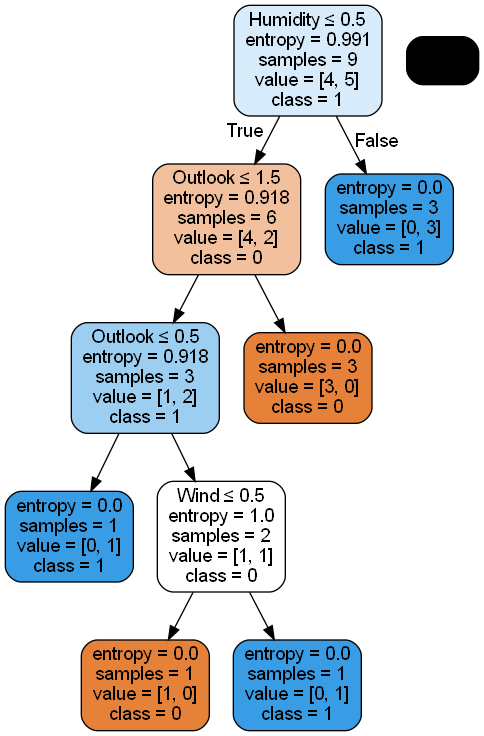

In [25]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus
dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data,
filled=True, rounded=True,
special_characters=True,feature_names =value,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('Play Tennis.png')
Image(graph.create_png())